Here, we train various models on each dataset, and tune their hyperparameters in order to find how accurately each model can classify each dataset, and which model classifies each dataset the best.

### Setup

In [2]:
F = {
	"STD": 0,
	"DROP": 1,
	"LABEL": 2,
	"ONEHOT": 3,
	"DUMMY": 4,
	"RAW": 5,
}

sets = {
	"anemia": [
		F["ONEHOT"], F["ONEHOT"], F["ONEHOT"], F["ONEHOT"], F["RAW"], F["RAW"], F["STD"], F["ONEHOT"], F["DUMMY"], F["DUMMY"], F["ONEHOT"], F["ONEHOT"], F["DROP"], F["DUMMY"], F["STD"], F["LABEL"], F["DUMMY"]
	],
	"aus_rain": [
		F["DROP"], F["ONEHOT"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["ONEHOT"], F["STD"], F["ONEHOT"], F["ONEHOT"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["DUMMY"], F["LABEL"]
	],
	"campusrecruitment": [
		F["DROP"], F["ONEHOT"], F["STD"], F["ONEHOT"], F["STD"], F["ONEHOT"], F["ONEHOT"], F["STD"], F["ONEHOT"], F["DUMMY"], F["STD"], F["ONEHOT"], F["STD"], F["LABEL"], F["DROP"]
	],
	"employability": [F["DUMMY"] for i in range(5)] + [F["LABEL"]],
	"fraud": [F["DROP"]] + [F["STD"] for i in range(28)] + [F["STD"], F["LABEL"]],
	"loan": [
		F["DROP"], F["STD"], F["STD"], F["STD"], F["DROP"], F["STD"], F["STD"], F["RAW"], F["STD"], F["DUMMY"], F["DUMMY"], F["DUMMY"], F["DUMMY"], F["LABEL"]
	],
	"mobile_price": [
		F["STD"], F["DUMMY"], F["STD"], F["DUMMY"], F["STD"], F["DUMMY"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["DUMMY"], F["DUMMY"], F["DUMMY"], F["LABEL"]
	],
	"stress": [
		F["STD"], F["STD"], F["DUMMY"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["STD"], F["LABEL"]
	],
	"student_testprep": [
		F["DUMMY"], F["ONEHOT"], F["ONEHOT"], F["ONEHOT"], F["LABEL"], F["STD"], F["STD"], F["STD"]
	],
	"titanic": [
		F["DROP"], F["LABEL"], F["ONEHOT"], F["DUMMY"], F["STD"], F["RAW"], F["RAW"], F["STD"], F["ONEHOT"]
	],
	"wine": [F["LABEL"]] + [F["STD"] for i in range(13)],
	"drug": [
		F["STD"], F["ONEHOT"], F["ONEHOT"], F["ONEHOT"], F["STD"], F["LABEL"]
	],
	"shipping": [
		F["DROP"], F["ONEHOT"], F["ONEHOT"], F["RAW"], F["RAW"], F["STD"], F["RAW"], F["ONEHOT"], F["ONEHOT"], F["STD"], F["STD"], F["LABEL"]
	]
}

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

SEED = 358

np.random.seed(SEED)

def load(dataset):
	df = pd.read_csv(f"datasets/{dataset}.csv")
	return df

def split(x):
	Train, Test = train_test_split(x, train_size=0.75, random_state=SEED)
	Train = Train.to_numpy()
	Test = Test.to_numpy()
	
	TrX, TrY = Train[:, :-1], Train[:, -1]
	TeX, TeY = Test[:, :-1], Test[:, -1]

	return TrX, TrY.astype('int'), TeX, TeY.astype('int')

TrX, TrY, TeX, TeY = split(load("drug"))

print(TrX.shape, TrY.shape, TeX.shape, TeY.shape)

(150, 9) (150,) (50, 9) (50,)


In [4]:
# load datasets, the first few cell blocks reload these, wasting time

datasets = {
	k: load(k) for k in sets
}

### Logistic Regression

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.utils.multiclass import type_of_target

accuracies = {
	k: 0 for k in sets
}

# baseline accuracies
for set in sets:
	TrX, TrY, TeX, TeY = split(load(set))
	lr = LogisticRegression(max_iter = 3000).fit(TrX, TrY)
	accuracies[set] = lr.score(TeX, TeY)

for k in sets:
	print(f"{k}: {accuracies[k]}")

anemia: 0.9945538332635107
aus_rain: 0.8560794044665012
campusrecruitment: 0.7777777777777778
employability: 0.9326923076923077
fraud: 0.965404690555579
loan: 0.7384
mobile_price: 0.954
stress: 0.8909090909090909
student_testprep: 0.752
titanic: 0.7892376681614349
wine: 0.9777777777777777
drug: 0.94
shipping: 0.6378181818181818


<BarContainer object of 13 artists>

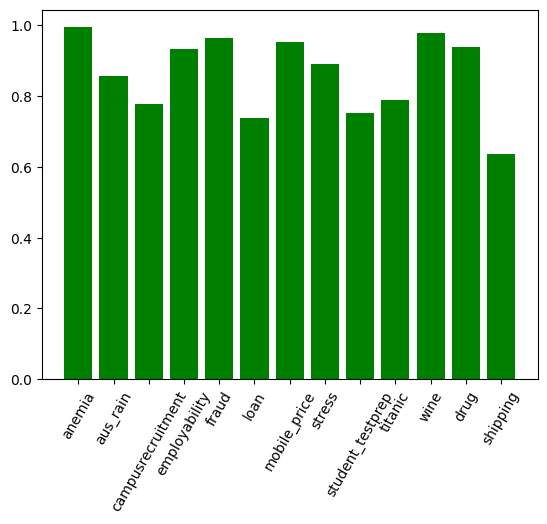

In [145]:
plt.xticks(rotation=60)
plt.bar(accuracies.keys(), accuracies.values(), color='g')

In [137]:
an = load("anemia")
X = an.iloc[:, :-1]
y = an.iloc[:, -1]

# performing a grid search to find the optimal hyperparameters for this dataset, with 5-fold cross validation
gs = GridSearchCV(LogisticRegression(max_iter=3000), {
	"C": [0.001, 0.01, 0.1, 1, 10],
}, cv=5).fit(X, y)

In [138]:
gs.best_score_, gs.best_params_

(0.9984284965950758, {'C': 10})

With the given range of hyperparameters, this is the best the logistic regression algorithm can do on this dataset. We can visualise this:

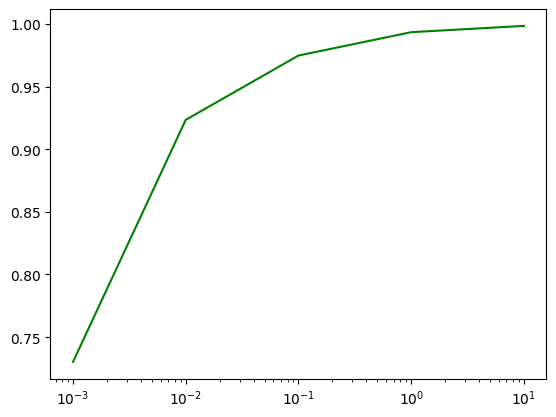

In [139]:
plt.xscale("log")
plt.plot(gs.cv_results_["param_C"], gs.cv_results_["mean_test_score"], color='g')

Utilising this same method for all our datasets, we can get the most accurate estimator type for each dataset (upto the subset of all hyperparameters we search through)

In [140]:
cv_scores = {
	k: 0 for k in sets
}

# cross validation scores
for set in sets:
	X = load(set).iloc[:, :-1]
	y = load(set).iloc[:, -1]
	cv_scores[set] = GridSearchCV(LogisticRegression(max_iter=3000), {
		"C": [0.001, 0.01, 0.1, 1, 10],
	}, cv=5).fit(X, y).best_score_

In [146]:
for k in sets:
	print(f"{k}: {cv_scores[k]}")

anemia: 0.9984284965950758
aus_rain: 0.8448245303084011
campusrecruitment: 0.8604651162790697
employability: 0.9167871485943774
fraud: 0.9626453053831139
loan: 0.7422000000000001
mobile_price: 0.9734999999999999
stress: 0.8818181818181818
student_testprep: 0.762
titanic: 0.7975560210753507
wine: 0.9888888888888889
drug: 0.96
shipping: 0.5949514655421886


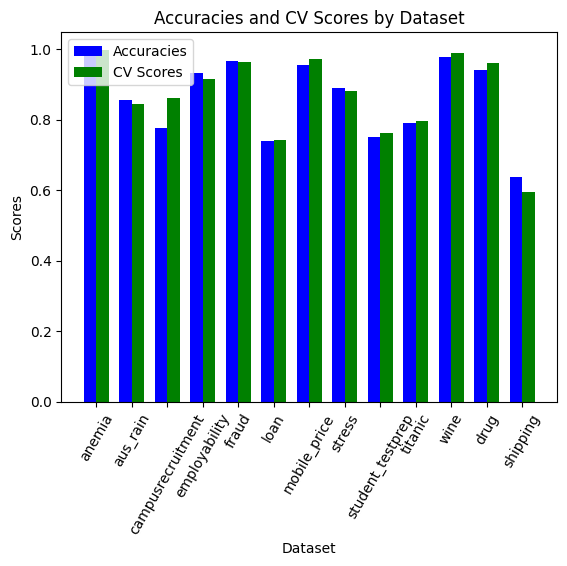

In [147]:
import matplotlib.pyplot as plt

datasets = list(sets.keys())

accuracy_values = list(accuracies.values())
cv_scores_values = list(cv_scores.values())

bar_width = 0.35

r1 = np.arange(len(datasets))
r2 = [x + bar_width for x in r1]

plt.bar(r1, accuracy_values, color='b', width=bar_width, label='Accuracies')
plt.bar(r2, cv_scores_values, color='g', width=bar_width, label='CV Scores')

plt.xlabel('Dataset')
plt.ylabel('Scores')
plt.title('Accuracies and CV Scores by Dataset')
plt.xticks([r + bar_width/2 for r in range(len(datasets))], datasets, rotation=60)
plt.legend()

plt.show()


We see that sometimes the baseline accuracy is higher than the best cross validation accuracy with tuned parameters. This is simply because evaluating a model purely based on a single train/test split will not usually give us a good idea of the model's performance, it may be the case that the split just works out in its favour. The Cross Validation score is a much more robust measure of a model's performance, and is what we use for our analysis.

In [173]:
logi_perf = pd.DataFrame([cv_scores.values()], columns=cv_scores.keys())
logi_perf.to_csv("logi.csv", index=False)

We will now continue to perform a similar analysis on our remaining models.

### K-Nearest Neighbours

The only hyperparameter we will tune here is k

In [168]:
from sklearn.neighbors import KNeighborsClassifier

knn_cv_scores = {k : 0 for k in sets}

for set in sets:
	X = load(set).iloc[:, :-1]
	y = load(set).iloc[:, -1]
	knn_cv_scores[set] = GridSearchCV(KNeighborsClassifier(), {
		"n_neighbors": [3, 5, 9, 15],
	}, cv=5).fit(X, y).best_score_

knn_cv_scores

Exception ignored in: <function tqdm.__del__ at 0x0000025025F8F760>
Traceback (most recent call last):
  File "c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem5\IML\proj\venv\lib\site-packages\tqdm\std.py", line 1149, in __del__
    self.close()
  File "c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem5\IML\proj\venv\lib\site-packages\tqdm\notebook.py", line 278, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x0000025025F8F760>
Traceback (most recent call last):
  File "c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem5\IML\proj\venv\lib\site-packages\tqdm\std.py", line 1149, in __del__
    self.close()
  File "c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem5\IML\proj\venv\lib\site-packages\tqdm\notebook.py", line 278, in close
    self.dis

{'anemia': 0.7404126499167625,
 'aus_rain': 0.8192130450194967,
 'campusrecruitment': 0.8279069767441861,
 'employability': 0.9336619204089084,
 'fraud': 0.9970314615831033,
 'loan': 0.7081999999999999,
 'mobile_price': 0.633,
 'stress': 0.8700000000000001,
 'student_testprep': 0.6809999999999999,
 'titanic': 0.8087856281343235,
 'wine': 0.9607936507936508,
 'drug': 0.9,
 'shipping': 0.6078609698623342}

Exception ignored in: <function tqdm.__del__ at 0x0000025025F8F760>
Traceback (most recent call last):
  File "c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem5\IML\proj\venv\lib\site-packages\tqdm\std.py", line 1149, in __del__
  File "c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem5\IML\proj\venv\lib\site-packages\tqdm\notebook.py", line 278, in close
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x0000025025F8F760>
Traceback (most recent call last):
  File "c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem5\IML\proj\venv\lib\site-packages\tqdm\std.py", line 1149, in __del__
  File "c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem5\IML\proj\venv\lib\site-packages\tqdm\notebook.py", line 278, in close
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm

<BarContainer object of 13 artists>

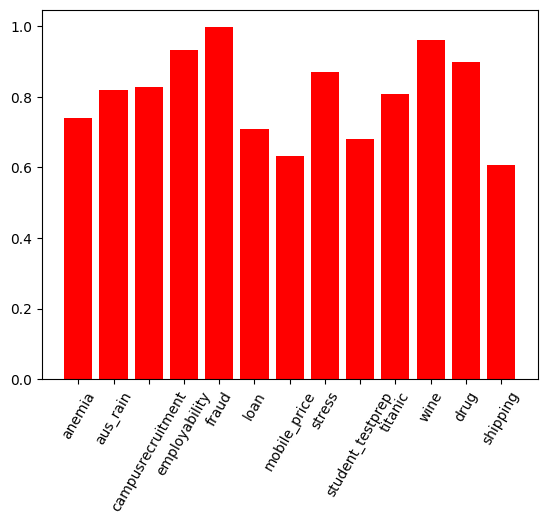

In [170]:
plt.xticks(rotation=60)
plt.bar(knn_cv_scores.keys(), knn_cv_scores.values(), color='r')

In [174]:
from tqdm.notebook import tqdm

knn_perf = pd.DataFrame([knn_cv_scores.values()], columns=knn_cv_scores.keys())
knn_perf.to_csv("knn.csv", index=False)

### FFN (1-2 hidden layers of constant size), low iterations for comparability to shallow models

Hyperparameters: learning rate, number of hidden layers

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

ffn_cv_scores = {k : 0 for k in sets}

for set in sets:
	data = load(set)
	X = data.iloc[:, :-1]
	y = data.iloc[:, -1]
	
	gs = GridSearchCV(
		MLPClassifier(),
		{
			"hidden_layer_sizes": [(64), (64, 64)],
			"learning_rate": ["adaptive", "constant"],
		},
		cv=3
	).fit(X, y)

	ffn_cv_scores[set] = gs.best_score_

for set in sets:
	print(f"{set}: {ffn_cv_scores[set]}")

c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem5\IML\proj\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem5\IML\proj\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem5\IML\proj\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem5\IML\proj\venv

anemia: 0.9960192750890425
aus_rain: 0.7778100061297013
campusrecruitment: 0.8603938445487742
employability: 0.940864856380474
fraud: 0.999067935466301
loan: 0.7436008596600008
mobile_price: 0.933490461976219
stress: 0.8827121891176922
student_testprep: 0.7490154825484167
titanic: 0.8200511117177784
wine: 0.9775894538606403
drug: 0.9748982360922659
shipping: 0.5929506086164958


c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem5\IML\proj\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


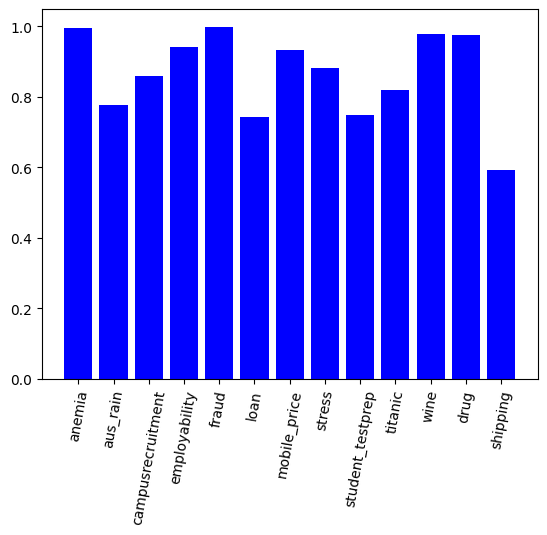

In [8]:
plt.xticks(rotation=80)
plt.bar(ffn_cv_scores.keys(), ffn_cv_scores.values(), color='b')
plt.show()


In [9]:
ffn_perf = pd.DataFrame([ffn_cv_scores.values()], columns=ffn_cv_scores.keys())
ffn_perf.to_csv("ffn.csv", index=False)

### Decision Trees

Hyperparameters: Max depth, criteria

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_cv_scores = {k : 0 for k in sets}

for set, data in datasets.items():
	X = data.iloc[:, :-1]
	y = data.iloc[:, -1]
	dt_cv_scores[set] = GridSearchCV(DecisionTreeClassifier(), {
		"max_depth": [3, 5, 9, 15],
		"criterion": ["gini", "entropy"],
	}, cv=5).fit(X, y).best_score_

for set in sets:
	print(f"{set}: {dt_cv_scores[set]}")

anemia: 1.0
aus_rain: 0.8176710386387807
campusrecruitment: 0.813953488372093
employability: 0.9372763782402338
fraud: 0.9938993721752281
loan: 0.7449999999999999
mobile_price: 0.8455
stress: 0.889090909090909
student_testprep: 0.68
titanic: 0.8144289976512409
wine: 0.9047619047619048
drug: 0.985
shipping: 0.6178598123113812


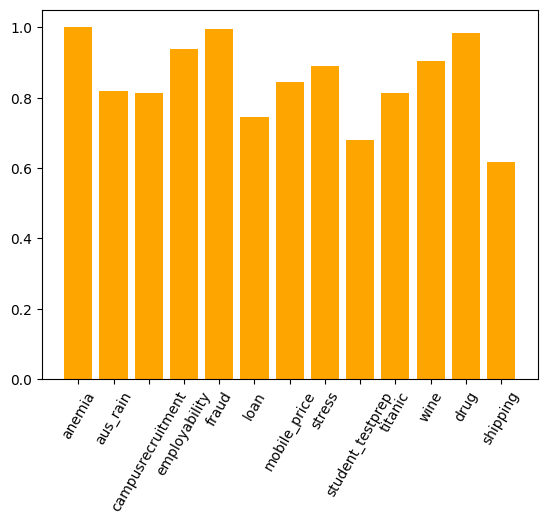

In [10]:
plt.xticks(rotation=60)
plt.bar(dt_cv_scores.keys(), dt_cv_scores.values(), color='orange')
plt.show()


In [12]:
data = pd.DataFrame([dt_cv_scores.values()], columns=dt_cv_scores.keys())
data.to_csv("dt.csv", index=False)